In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

election_data= pd.read_csv("General Election Data.csv")
election_data.head()

In [66]:
#calculating 1971 vote share
inc_1971=election_data[(election_data['Year']==1971) & (election_data["Party"]=="INC")]         
inc_1971=inc_1971.groupby("State_Name")

inc_1971= inc_1971.Vote_Share_Percentage.agg(np.mean)

inc_1971.rename(index={"Mysore":"Karnataka"}, inplace=True)

#calculating 1977 vote share
inc_1977=election_data[(election_data['Year']==1977) & (election_data["Party"]=="INC")]         
inc_1977=inc_1977.groupby("State_Name")

inc_1977= inc_1977.Vote_Share_Percentage.agg(np.mean)



In [119]:
vote_diff= inc_1971-inc_1977

vote_diff.dropna(inplace=True)
vote_diff

State_Name
Andaman_&_Nicobar_Islands     3.030000
Andhra_Pradesh                2.386828
Assam                         8.462912
Bihar                        21.694007
Chandigarh                   38.480000
Dadra_&_Nagar_Haveli         -7.760000
Delhi                        34.464286
Goa,_Daman_&_Diu              8.175000
Gujarat                       0.400886
Haryana                      32.625556
Himachal_Pradesh             37.462500
Jammu_&_Kashmir               6.276667
Karnataka                    13.539233
Kerala                       -0.253247
Madhya_Pradesh               13.141930
Maharashtra                  15.932162
Manipur                     -15.420000
Odisha                       -1.267737
Punjab                       20.019021
Rajasthan                    19.610991
Tamil_Nadu                   -2.470242
Tripura                      -3.535000
Uttar_Pradesh                29.243078
West_Bengal                   0.872789
Name: Vote_Share_Percentage, dtype: float64

# calculating reduction poverty with 1973-74 data and 1977-78 data

In [98]:
poverty_data_77= pd.read_csv("Poverty data 1977-78.csv", skiprows=5, skipfooter=17,names=["states", "rural_absolute", "rural_precentage", "urban_absolute","urban_precentage", "combined_absolute", "combained_precentage" ])
poverty_data_73= pd.read_csv("Poverty data 1973-74.csv", skiprows=5, skipfooter=1,names=["states", "rural_absolute", "rural_precentage", "urban_absolute","urban_precentage", "combined_absolute", "combained_precentage" ])

poverty_data_77.set_index("states", inplace=True)
poverty_data_73.set_index("states", inplace=True)


poverty_data_73.head()  

<ipython-input-98-6ce75edb971e>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  poverty_data_77= pd.read_csv("Poverty data 1977-78.csv", skiprows=5, skipfooter=17,names=["states", "rural_absolute", "rural_precentage", "urban_absolute","urban_precentage", "combined_absolute", "combained_precentage" ])
<ipython-input-98-6ce75edb971e>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  poverty_data_73= pd.read_csv("Poverty data 1973-74.csv", skiprows=5, skipfooter=1,names=["states", "rural_absolute", "rural_precentage", "urban_absolute","urban_precentage", "combined_absolute", "combained_precentage" ])


,rural_absolute,rural_precentage,urban_absolute,urban_precentage,combined_absolute,combained_precentage
states,,,,,,
Andhra Pradesh,178.21,48.41,47.48,50.61,225.69,48.86
Arunachal Pradesh,2.57,52.67,0.09,36.92,2.66,51.93
Assam,76.37,52.67,5.46,36.92,81.83,51.21
Bihar,336.52,62.99,34.05,52.96,370.57,61.91
Goa,3.16,46.85,1.00,37.69,4.16,44.26


<AxesSubplot:xlabel='combained_precentage', ylabel='states'>

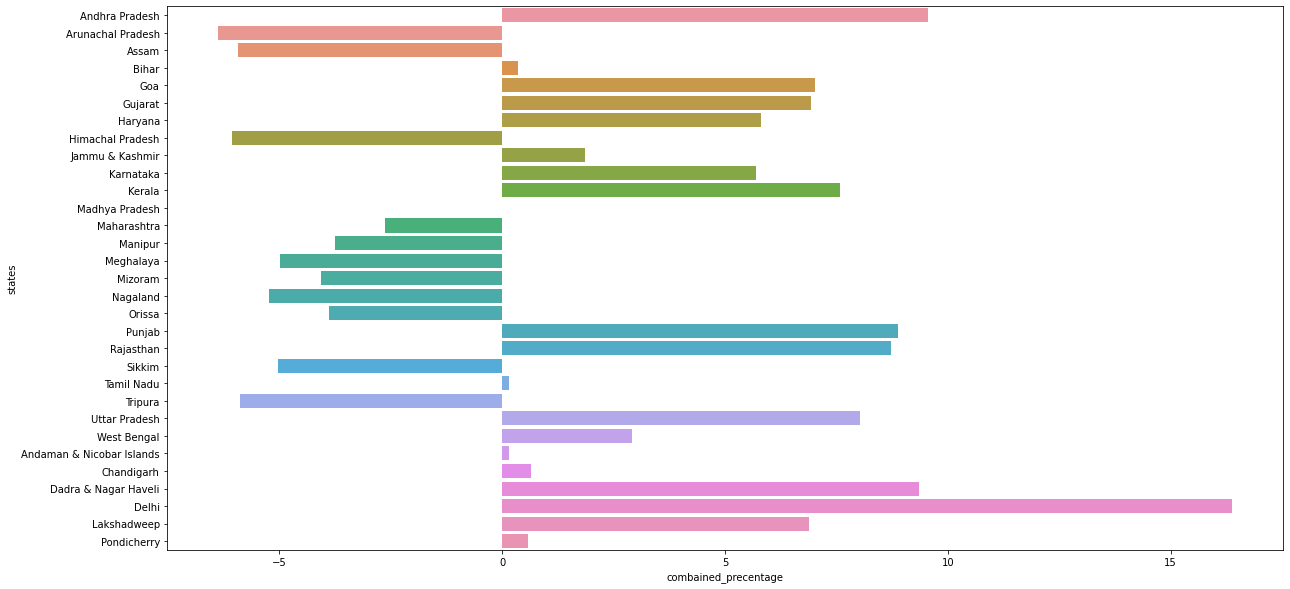

In [78]:
poverty_diff=poverty_data_73["combained_precentage"] - poverty_data_77["combained_precentage"]

fig,ax=plt.subplots(figsize=(20,10))
sns.barplot( x=poverty_diff, y=poverty_data_77["states"], ax=ax)

In [111]:
vote_diff.index, poverty_diff.index

(Index(['Andaman_&_Nicobar_Islands', 'Andhra_Pradesh', 'Assam', 'Bihar',
        'Chandigarh', 'Dadra_&_Nagar_Haveli', 'Delhi', 'Goa,_Daman_&_Diu',
        'Gujarat', 'Haryana', 'Himachal_Pradesh', 'Jammu_&_Kashmir',
        'Karnataka', 'Kerala', 'Madhya_Pradesh', 'Maharashtra', 'Manipur',
        'Odisha', 'Punjab', 'Rajasthan', 'Tamil_Nadu', 'Tripura',
        'Uttar_Pradesh', 'West_Bengal'],
       dtype='object', name='State_Name'),
 Index(['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
        'Assam', 'Bihar', 'Chandigarh', 'Dadra & Nagar Haveli', 'Delhi', 'Goa',
        'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
        'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
        'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Orissa', 'Pondicherry',
        'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tripura',
        'Uttar Pradesh', 'West Bengal'],
       dtype='object', name='states'))

In [121]:
#Correcting index names (removing data)
proper_index=[]
for state in vote_diff.index:
    proper_index.append(state.replace("_", " "))
    
rename_dir={}

for i,j in zip(proper_index, vote_diff.index):
    rename_dir[j]=i

vote_diff.rename(index=rename_dir, inplace=True)



In [124]:
poverty_data_77["combained_precentage"].filter(items=vote_diff.index)

states
Andaman & Nicobar Islands    55.42
Andhra Pradesh               39.31
Assam                        57.15
Bihar                        61.55
Chandigarh                   27.32
Dadra & Nagar Haveli         37.20
Delhi                        33.23
Gujarat                      41.23
Haryana                      29.55
Himachal Pradesh             32.45
Jammu & Kashmir              38.97
Karnataka                    48.78
Kerala                       52.22
Madhya Pradesh               61.78
Maharashtra                  55.88
Manipur                      53.72
Punjab                       19.27
Rajasthan                    37.42
Tamil Nadu                   54.79
Tripura                      56.88
Uttar Pradesh                49.05
West Bengal                  60.52
Name: combained_precentage, dtype: float64

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


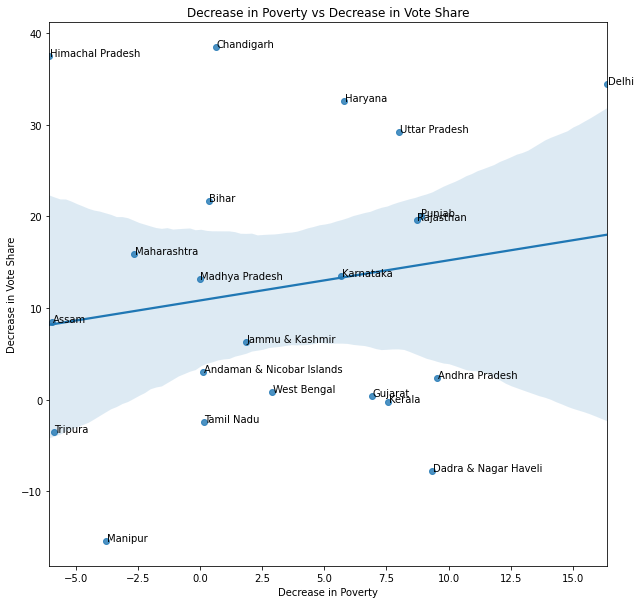

In [146]:
fig, ax=plt.subplots(figsize=(10,10))

sns.regplot(y=vote_diff.filter(items=poverty_diff.index), x=poverty_diff.filter(items=vote_diff.index), ax=ax )

plt.title("Decrease in Poverty vs Decrease in Vote Share")
plt.xlabel("Decrease in Poverty")
plt.ylabel("Decrease in Vote Share")

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))
        
label_point( poverty_diff.filter(items=vote_diff.index),vote_diff.filter(items=poverty_diff.index),
              pd.Series(vote_diff.index, index=list(vote_diff.index)), ax)